## 데이터셋

이전에 3.4.1에서 사용한 __IMDB__ 데이터셋을 사용한다.


[IMDB_MIP_sigmoid.ipynb](https://github.com/Nevation/Keras/blob/master/IMDB_MIP_sigmoid.ipynb)에 데이터셋에 대한 설명이 있다.

In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

Using TensorFlow backend.


num_words=20000은 20,000번째까지 사용 빈도수가 높은 단어의 데이터셋을 가져오는 인자이다.

In [2]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

훈련셋과 검증셋을 분류하는 작업이다.

In [3]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

Data들의 길이를 맞춰주기 위해 Dataset을 전처리를 한다.

여기서 maxlen을 200으로 설정했기 때문에, 만약 Data의 길이 (문장의 길이)가 200이 안된다면, 200까지 0으로 채우고 반대로 200을 넘길 경우 자르는 작업을 한다.


In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Embedding(20000, 128, input_length=200))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation='sigmoid'))

모델을 설정하는 작업이다.

모델에 관련된 패키지를 import를 한 뒤, model이라는 변수에 모델을 초기화한다.

이후 CNN모델과 LSTM 모델을 합친 CNN+LSTM모델로 세팅을 해준다.

1. Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)
    * 여기서 인자로 input_dim, output_dim, input_length을 사용했다.
    * __input_dim__은 데이터의 종류의 개수이며, 20,000을 대입했으니 20,000개의 데이터의 종류가 있다는 의미이다.
    * __output_dim__은 데이터를 인코딩 한 뒤에 나오는 벡터의 크기이다. 따라서 128을 대입했으니 128차원의 벡터로 반환하게 된다. (ex. [0, 0, 0, .. ,0 ,0] len이 128인 배열과 비슷하다.)
    * __input_length__는 데이터의 길이를 나타내게 된다. 여기서는 문장을 sequence를 이용해 200으로 세팅을 했으니 200을 대입하게 된다.
    
    
2. Dropout(rate, noise_shape=None, seed=None)
    * 인자로 rate을 대입해주었다.
    * 이 함수는 __과대적합__을 방지하기 위해 사용된다고 한다.
    * __rate__는 과대적합을 방지하기 위해 임의의 입력 뉴런 얼마나 drop하려고 하는지에 대한 인자이다. 
    * 여기서는 0.2를 넣었으니 20%정도 drop한다고 생각하면 된다.
    

3. Conv1D(filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
    * 여기서 인자로 filters, kernel_size, padding, activation, strides를 사용했다.
    * __filter__는 들어노는 차원수를 의미하는데, 256를 대입하는 이유는 Embedding에서 256차원으로 반환(이부분 정보 부족.. 모르겠음)을 하기 때문이다.
    * 나머지는 찾았지만, 의미를 이해하기 어려워서 번역하지 않고 추가해서 남기려고 한다.
    * __kernel_size__: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.
    * __padding__: One of "valid", "causal" or "same" (case-insensitive).  "valid" means "no padding".  "same" results in padding the input such that the output has the same length as the original input. 
    * __activation__: Activation function to use (see activations). If you don't specify anything, no activation is applied
    * __strides__: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
    
    
4. LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)
    * 여기선 units만 사용했다.
    * __units__는 차원을 의미한다. 따라서 Embedding에서 인코딩된 128을 받게 된다.
    

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 49, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,855,809
Trainable params: 2,855,809
Non-trainable params: 0
_________________________________________________________________


이제 만든 모델에 대한 요약이다.

왼쪽에는 사용한 __Layer__, 중간에는 반환된 __Shpae__이 나오게 된다.

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

컴파일 설정을 해주는 함수이다.

__binary_crossentropy__: 두개의 클래스중에서 예측할때 사용하는 함수 (교차 엔트로피)


__adam__: Momentum과 RMSprop를 합친 경사 하강법 



__accuracy__:  다중클래스분류 문제에서 평가기준을 ‘accuracy’로 지정했을 경우 내부적으로 categorical_accuracy() 함수를 이용하여 정확도가 계산.

In [7]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 129s 6ms/step - loss: 0.4025 - acc: 0.8004 - val_loss: 0.3040 - val_acc: 0.8768
Epoch 2/25
20000/20000 [==============================] - 125s 6ms/step - loss: 0.1888 - acc: 0.9288 - val_loss: 0.3434 - val_acc: 0.8568
Epoch 3/25
20000/20000 [==============================] - 92s 5ms/step - loss: 0.0938 - acc: 0.9694 - val_loss: 0.4219 - val_acc: 0.8568
Epoch 4/25
20000/20000 [==============================] - 85s 4ms/step - loss: 0.0494 - acc: 0.9852 - val_loss: 0.5780 - val_acc: 0.8622
Epoch 5/25
20000/20000 [==============================] - 83s 4ms/step - loss: 0.0353 - acc: 0.9888 - val_loss: 0.5158 - val_acc: 0.8562
Epoch 6/25
20000/20000 [==============================] - 84s 4ms/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.5904 - val_acc: 0.8592
Epoch 7/25
20000/20000 [==============================] - 83s 4ms/step - loss: 0.0201 - acc: 0.9940 - val_loss: 0.5785 - val_ac

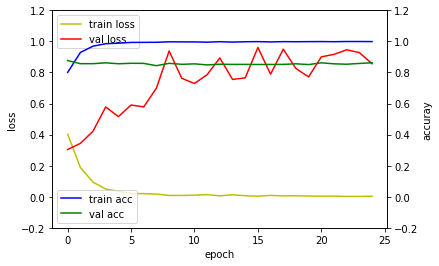

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 19s 750us/step
## evaluation loss and_metrics ##
[1.0223047134590149, 0.837]


## 결론

저번과 다르게 dropout을 이용해 과대적합을 방지하니 epoch값에 따라 정확도가 오르고 있다. 

